In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 214MB/s]
100% 1.06G/1.06G [00:04<00:00, 245MB/s]


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [16]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3),padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size = (3, 3),padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size = (3, 3),padding='valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
history=model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 87ms/step - loss: 0.7260 - accuracy: 0.6246 - val_loss: 0.6639 - val_accuracy: 0.6462
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5265 - accuracy: 0.7362 - val_loss: 0.4940 - val_accuracy: 0.7652
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4429 - accuracy: 0.7858 - val_loss: 0.5131 - val_accuracy: 0.7520
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3760 - accuracy: 0.8247 - val_loss: 0.6271 - val_accuracy: 0.7128
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3066 - accuracy: 0.8603 - val_loss: 0.6364 - val_accuracy: 0.7120
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2315 - accuracy: 0.8971 - val_loss: 0.8256 - val_accuracy: 0.7488
Epoch 7/10
625/625 [==============================] - 55s 86ms/step - loss: 0.1772 - accuracy: 0.9212 - val_loss: 2.1792 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

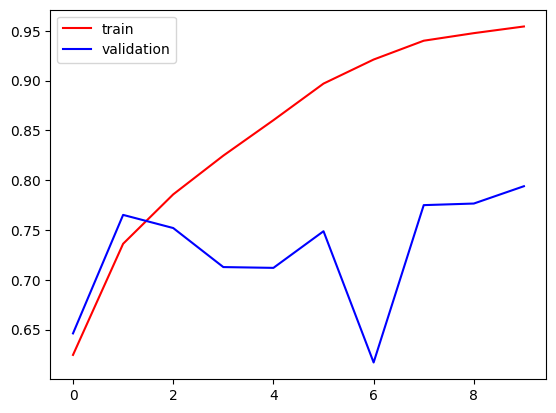

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

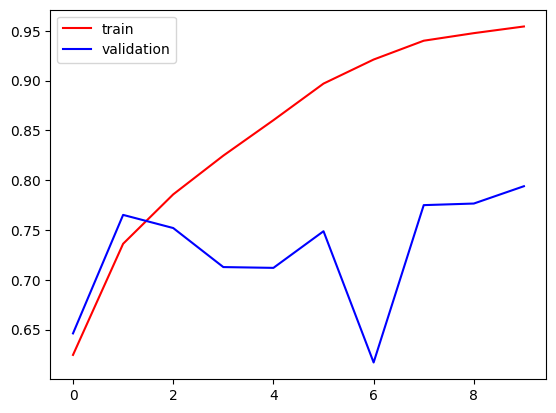

In [26]:
plt.plot(history.history['accuracy'], color = 'red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

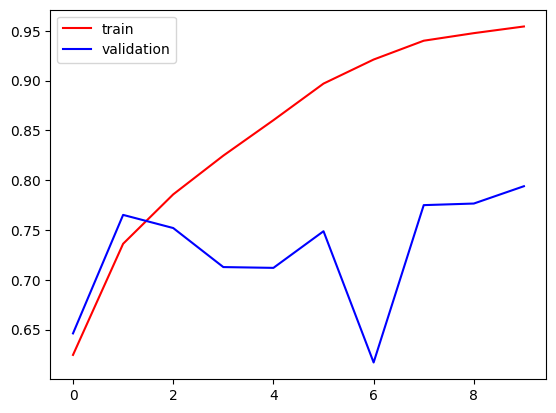

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

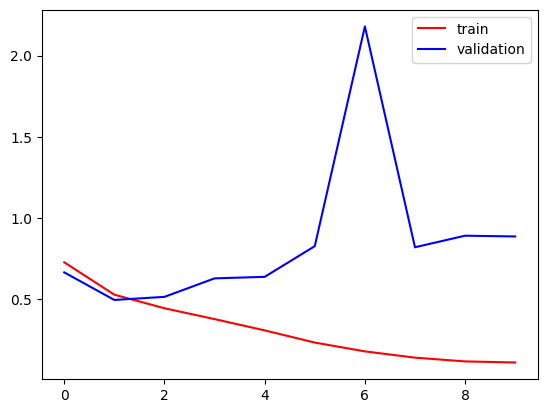

In [23]:
plt.plot(history.history['loss'], color = 'red',label='train')
plt.plot(history.history['val_loss'], color = 'blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

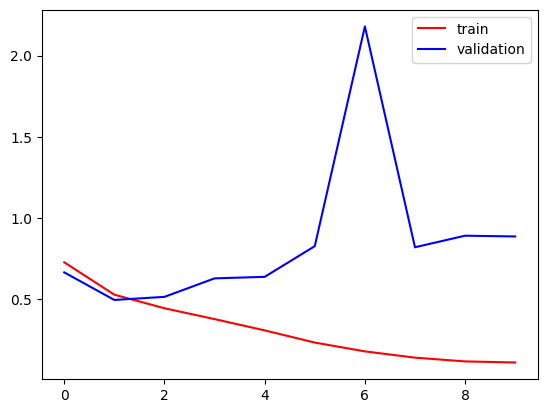

In [27]:
plt.plot(history.history['loss'], color = 'red',label='train')
plt.plot(history.history['val_loss'], color = 'blue',label='validation')
plt.legend()
plt.show

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Normalization
# Reduce complexity

In [28]:
import cv2

In [79]:
test_img = cv2.imread('/content/train/cats/cat.10004.jpg')


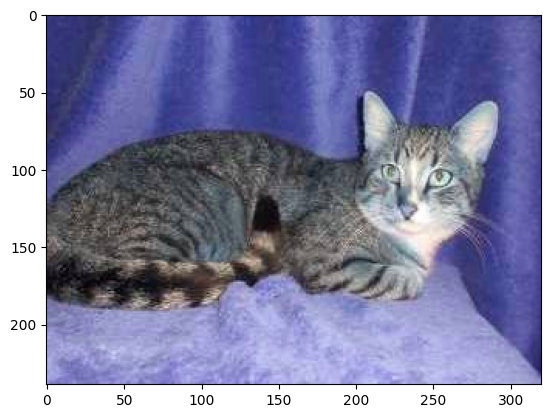

In [80]:
plt.imshow(test_img)


In [81]:
test_img.shape

(239, 320, 3)

In [82]:
test_img = cv2.resize(test_img, (256, 256))

In [83]:
test_input = test_img.reshape((1, 256, 256, 3))

In [84]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

In [87]:
y_pred = model.predict(test_input)
if(y_pred > 0.5):
  print('dog')
else:
  print('cat')

1/1 [==============================] - 0s 18ms/step
cat
